In [ ]:
from sklearn import datasets, linear_model
import numpy as np

In [ ]:
x_train = [[1,2,3,4],[1,4,5,6],[1,7,8,9],[1,13,25,2],[1,23,67,1]]
y_train = [19,31,49,81,183]

x_test = [[1,13,14,25]]

lr_model = linear_model.LinearRegression()

lr_model.fit(x_train, y_train)

pred = lr_model.predict(x_test)
print(pred)

[105.]


In [ ]:
x_train = [[1,2,3,4],[1,4,5,6],[1,7,8,9],[1,13,25,2],[1,23,67,1]]
y_train = [19,31,49,81,183]

x_test = [[1,13,14,25]]

x_train = np.asmatrix(x_train)
y_train = np.asmatrix(y_train)
print(x_train)
print(y_train)

def compute_A(x_train):
  A = np.zeros((4,4))
  for x_is in x_train:
    A += np.matmul(x_is.T, x_is)
    # print(x_is)
    # print(A)
  return A

def compute_b(x_train, y_train):
  b = np.matmul(x_train.T, y_train.T)
  # print(b)
  return b

def compute_w(A,b,lamda=0.5):
  I = np.identity(4)
  A = np.add(lamda * I, A)
  inverse = np.linalg.inv(A)
  w = np.dot(np.asmatrix(inverse), b)
  # print(w)
  return w

def predict(x,w):
  val = np.dot(x,w)
  print(val)

A = compute_A(x_train)
print(A)
b = compute_b(x_train, y_train)
print(b)
w = compute_w(A,b)
print(w)
predict(x_test,w)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
(646, 6)
(1, 646)
lol
[2018.0579630552265, 7961.6487522915195, 1997.2142125910414, 9074.207054135892, 8257.296883549292, 5188.923423818131, 2675.9661941574714, 2106.951804

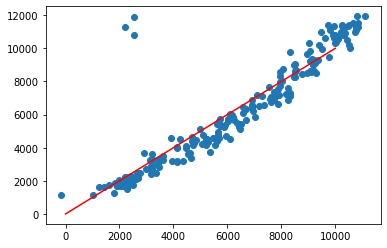

In [ ]:
import pandas as pd
my_df = pd.read_csv("./insurance.csv")
print(my_df)
def compute_A(x_train):
  A = np.zeros((6,6))
  for x_is in x_train:
    A += np.matmul(x_is.T, x_is)
    # print(x_is)
    # print(A)
  return A

def compute_b(x_train, y_train):
  print(x_train.shape)
  print(y_train.shape)
  b = np.matmul(x_train.T, y_train.T)
  # print(b)
  return b

def compute_w(A,b,lamda=0.1):
  I = np.identity(6)
  A = np.add(lamda * I, A)
  inverse = np.linalg.inv(A)
  w = np.dot(np.asmatrix(inverse), b)
  # print(w)
  return w

def predict(x,w):
  val = np.dot(x,w)
  # print(val)
  return np.asarray(val)[0][0]
my_df.sex = pd.Categorical(my_df.sex)
my_df['sex'] = my_df.sex.cat.codes

my_df.smoker = pd.Categorical(my_df.smoker)
my_df['smoker'] = my_df.smoker.cat.codes

my_df.region = pd.Categorical(my_df.region)
my_df['region'] = my_df.region.cat.codes
# print(my_df)

my_df = my_df.loc[my_df['charges'] < 12000]

data = my_df.to_numpy()
test_data = data[-200:]
data = data[:-200]
# print(test_data)
train_x = data[:,:-1]
train_y = data[:,-1]

test_x = test_data[:,:-1]
test_y = test_data[:,-1]
# print(train_x)
# print(train_y)
train_x = np.asmatrix(train_x)
train_y = np.asmatrix(train_y)

A = compute_A(train_x)
b = compute_b(train_x, train_y)
w = compute_w(A,b)

preds = []
for t in test_x:
  preds.append(predict(t,w))
print("lol")
print(preds)
print(test_y)
import matplotlib.pyplot as plt
plt.scatter(preds, test_y)

plt.plot([1,10000], [1,10000], color="red")
# axline((1, 2), (2, 2))
# predict(x_test,w)
# cat_columns = my_df.select_dtypes(['category']).columns
# print(cat_columns)

# num_cols = my_df._get_numeric_data().columns